In [137]:
# [데이터 컬럼 설명]
# - 해당 데이터세트에는 2011년 1월 부터 2012년 2월까지
# - 날짜/시간 , 기온 습도 풍속등의 정보를 기반으로 
# - [1시간 간갹] 동안의 [ 자전거 대여 횟수]가 기재되어 있습니다 
# - 네이터 세트으이 주요 칼럼은 다음과 같습니다 

# <독립변수>
# 날짜/시간, 기온, 습도, 풍속 등의 정보

# <종속변수>
# 이중 **[결정값]은 맨 마지막에 컬럼인 [count]로 ['대여횟수']를 의미합니다 
"""
[독립변수 설명]----------------
 - datetime   : hourly date + timestamp
 - season     : 1=봄, 2=여름, 3=가을, 4=겨울
 - holiday    : 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
 - workingday : 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
 - weather    : 1=맑음, 약간 구름 낀 흐림
              : 2=안개, 안개 + 흐림
              : 3=가벼운 눈, 가벼운 비 + 천둥
              : 4=심한 눈/비, 천둥/번개
 - temp       : 온도(섭씨)
 - atemp      : 체감온도(섭씨)
 - humidity   : 상대습도
 - windspeed  : 풍속
 - casual     : 사전에 등록되지 않은 사용자가 대여한 횟수
 - registered : 사전에 등록된 사용자가 대여한 횟수
 
[종속변수 설명]-----------------
 - count      : 대여 횟수
"""

'\n[독립변수 설명]----------------\n - datetime   : hourly date + timestamp\n - season     : 1=봄, 2=여름, 3=가을, 4=겨울\n - holiday    : 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날\n - workingday : 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일\n - weather    : 1=맑음, 약간 구름 낀 흐림\n              : 2=안개, 안개 + 흐림\n              : 3=가벼운 눈, 가벼운 비 + 천둥\n              : 4=심한 눈/비, 천둥/번개\n - temp       : 온도(섭씨)\n - atemp      : 체감온도(섭씨)\n - humidity   : 상대습도\n - windspeed  : 풍속\n - casual     : 사전에 등록되지 않은 사용자가 대여한 횟수\n - registered : 사전에 등록된 사용자가 대여한 횟수\n \n[종속변수 설명]-----------------\n - count      : 대여 횟수\n'

In [138]:
import pandas as pd

In [139]:
train = pd.read_csv("./train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [141]:
train.describe()
#temp 41도 이상치? 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [142]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [143]:
# 이상치 처리 함수 
def getOutliers_Iqr(data) :
    # - q1 : 최소 이상치 한계값
    # - q3 : 최대 이상치 한계값
    q1, q3 = np.percentile(data, [25, 75])
    print("q1=", q1, " / q3=", q3)
    
    ### IQR 계산하기
    iqr = q3 - q1
    print("IQR = ", iqr)
    
    ### 최대 이상치 한계
    upper_bound = q3 + (iqr * 1.5)
    print("최대 이상치 한계 = ", upper_bound)
    
    ### 최소 이상치 한계
    lower_bound = q1 - (iqr * 1.5)
    print("최소 이상치 한계 = ", lower_bound)

    return np.where((data > upper_bound) | (data < lower_bound))

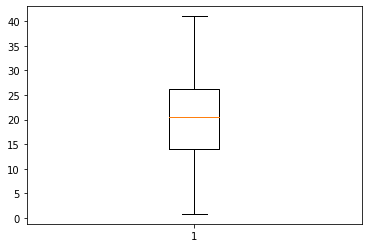

In [144]:
# 온도 이상치 확인 
plt.boxplot(train["temp"])
plt.show()

In [145]:
# 온도 최대/최소 이상치 확인 
train['temp'].describe()
# q1(25%): 13.94 , q3(75%): 26.24

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [146]:
q1,q3 = np.percentile(train["temp"], [25,75])
print("q1=",q1, "/ q3= ",q3)

q1= 13.94 / q3=  26.24


In [147]:
iqr = q3 =q1 
print("IQR = ",iqr)

IQR =  13.94


In [148]:
up_temp = q3 + (iqr * 1.5)
low_temp = q1 - (iqr * 1.5)
print(up_temp, low_temp)

34.85 -6.970000000000001


In [149]:
cd_temp = (train['temp'] > up_temp) | (train['temp'] < low_temp)
print(len(train[cd_temp]))
temp_out_index = np.where(train[cd_temp])
temp_out_index

193


(array([  0,   0,   0, ..., 192, 192, 192], dtype=int64),
 array([ 0,  1,  3, ...,  9, 10, 11], dtype=int64))

In [150]:
train.index

RangeIndex(start=0, stop=10886, step=1)

In [151]:
df_temp = pd.DataFrame()

for idx in train.index :
    if idx not in temp_out_index[0] :
        df_temp = pd.concat([df_temp, train.loc[[idx]]],ignore_index = True)
print(len(df_temp))
df_temp

#df_temp : temp 이상치 제거한 데이터 프레임 

10693


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-09 08:00:00,1,0,0,1,4.10,4.545,49,19.0012,0,10,10
1,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
2,2011-01-09 10:00:00,1,0,0,1,5.74,5.305,43,26.0027,0,49,49
3,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
4,2011-01-09 12:00:00,1,0,0,1,7.38,6.820,37,30.0026,4,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10689,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10690,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10691,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [152]:
df_temp['temp'].describe()
#????????????  -> 온도 박스 플롯에 이상치 확인 X -> 이상치 처리 안한다 

count    10693.000000
mean        20.424695
std          7.709463
min          0.820000
25%         13.940000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64

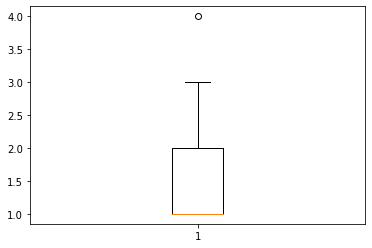

In [153]:
# weather 이상치 처리하기 -> 4 : (심한 눈/비, 천둥/번개) 이 날씨에 자전거를???
plt.boxplot(train["weather"])
plt.show()

In [154]:
# cd_weather = (train['weather'] == 4)
# weather_out_index = np.where(train[cd_weather])
# print(len(train[cd_weather]))
# weather_out_index

# # df_weather = getOutliers_Iqr(train['weather'])
# # df_weather

In [155]:
df_weather = train.drop(train[train['weather'] == 4].index , axis = 0)
df_wth = df_weather.reset_index(drop=True)
print(len(df_weather))

10885


In [156]:
df_wth['weather'].describe()

count    10885.000000
mean         1.418190
std          0.633384
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: weather, dtype: float64

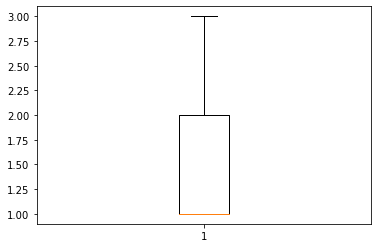

10885

In [157]:
plt.boxplot(df_wth["weather"])
plt.show()
len(df_wth)

In [158]:
df_wth['weather'].describe()

count    10885.000000
mean         1.418190
std          0.633384
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: weather, dtype: float64

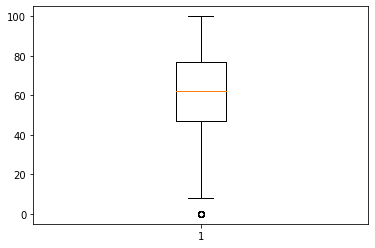

In [159]:
# humidity(상대습도) 이상치 확인 하기 -> 습도 0 => 이상치  
plt.boxplot(df_wth["humidity"])
plt.show()

In [160]:
len(df_wth[df_wth['humidity'] == 0])

22

In [161]:
df_wth_humidity = df_wth.drop(df_wth[df_wth['humidity'] == 0].index , axis = 0)
print(len(df_wth_humidity))
df_wth_hum = df_wth_humidity.reset_index(drop = True)

10863


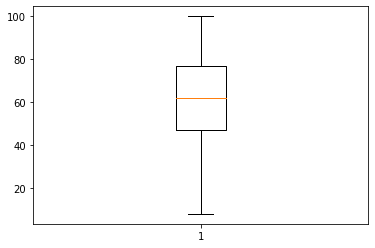

In [162]:
plt.boxplot(df_wth_hum["humidity"])
plt.show()

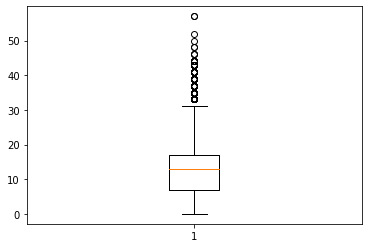

In [163]:
# windspeed (풍속) 이상치 제거하기 
plt.boxplot(df_wth_hum["windspeed"])
plt.show()

In [164]:
# 최대 최소 이상치 구하기 
df_wth_hum["windspeed"].describe()

count    10863.000000
mean        12.790409
std          8.164870
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [165]:
q1,q3 = np.percentile(df_wth_hum["windspeed"], [25,75])
print("q1= ",q1, "/ q3= ",q3)

q1=  7.0015 / q3=  16.9979


In [166]:
iqr = q3 - q1
print("IQR = ", iqr)

IQR =  9.996400000000001


In [167]:
up_wind = q3 + (iqr * 1.5)
low_wind = q1 - (iqr * 1.5)
print(up_wind, low_wind)

31.992500000000003 -7.993100000000002


In [168]:
wind_cd = (df_wth_hum["windspeed"] > up_wind) | (df_wth_hum["windspeed"] \
                                                      < low_wind)
print(len(df_wth_hum[wind_cd]))

226


In [169]:
np.where(wind_cd)

(array([  175,   178,   194,   196,   265,   271,   471,   472,   473,
          474,   479,   604,   605,   606,   608,   612,   613,   705,
          749,   750,   752,   753,   754,   756,   757,   758,   760,
          761,   762,   848,   850,   853,   860,   861,   862,   863,
          864,   865,   866,   867,   868,   869,   870,   873,   874,
          875,   919,   920,   923,   924,   929,  1015,  1017,  1022,
         1023,  1129,  1285,  1291,  1358,  1387,  1388,  1389,  1390,
         1391,  1393,  1401,  1405,  1406,  1411,  1415,  1418,  1434,
         1555,  1556,  1557,  1560,  1573,  1579,  1652,  1672,  1673,
         1674,  1675,  1677,  1699,  1816,  1817,  1818,  1831,  1865,
         1867,  2246,  2252,  2253,  2503,  2733,  2734,  2941,  3178,
         3285,  3457,  3458,  3573,  3574,  3698,  3931,  4381,  4384,
         4472,  4473,  4474,  4572,  4738,  4739,  4741,  4790,  5107,
         5108,  5109,  5292,  5434,  5458,  5459,  5460,  5461,  5463,
      

In [170]:
df_wth_hum.loc[np.where((df_wth_hum["windspeed"] > up_wind) | (df_wth_hum["windspeed"] \
                                                      < low_wind))]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262
10131,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235
10240,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5
10517,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218


In [171]:
wind_out_index = np.where(wind_cd)
wind_out_index

(array([  175,   178,   194,   196,   265,   271,   471,   472,   473,
          474,   479,   604,   605,   606,   608,   612,   613,   705,
          749,   750,   752,   753,   754,   756,   757,   758,   760,
          761,   762,   848,   850,   853,   860,   861,   862,   863,
          864,   865,   866,   867,   868,   869,   870,   873,   874,
          875,   919,   920,   923,   924,   929,  1015,  1017,  1022,
         1023,  1129,  1285,  1291,  1358,  1387,  1388,  1389,  1390,
         1391,  1393,  1401,  1405,  1406,  1411,  1415,  1418,  1434,
         1555,  1556,  1557,  1560,  1573,  1579,  1652,  1672,  1673,
         1674,  1675,  1677,  1699,  1816,  1817,  1818,  1831,  1865,
         1867,  2246,  2252,  2253,  2503,  2733,  2734,  2941,  3178,
         3285,  3457,  3458,  3573,  3574,  3698,  3931,  4381,  4384,
         4472,  4473,  4474,  4572,  4738,  4739,  4741,  4790,  5107,
         5108,  5109,  5292,  5434,  5458,  5459,  5460,  5461,  5463,
      

In [172]:
# 데이터 프레임 형식인 것 확인 하고 해야지 이상 없이 처리 된다!! 
df_wth_hum.index

RangeIndex(start=0, stop=10863, step=1)

In [173]:
df_wth_hu_wind = pd.DataFrame()

for idx in df_wth_hum.index :
    # 아닌 조건(포함되어 있지 않다면) : not in
    # 포함되어 있다면 : in
    if idx not in wind_out_index[0] :
        df_wth_hu_wind = pd.concat([df_wth_hu_wind, df_wth_hum.loc[[idx]]],
                             ignore_index = True)
        
print(len(df_wth_hu_wind))
df_new = df_wth_hu_wind.reset_index(drop=True)

df_new['windspeed'].describe()

10637


count    10637.000000
mean        12.284989
std          7.443243
min          0.000000
25%          7.001500
50%         11.001400
75%         16.997900
max         31.000900
Name: windspeed, dtype: float64

In [175]:
df_wth_.loc[np.where((df_wth_hu_wind["windspeed"] > up_wind) | (df_wth_hu_wind["windspeed"] \
                                                      < low_wind))]

NameError: name 'df_wth_' is not defined

In [ ]:
df_new = df_wth_humidity.drop(wind_out_index[0], axis=0)
print(len(df_new))
df_new

10637


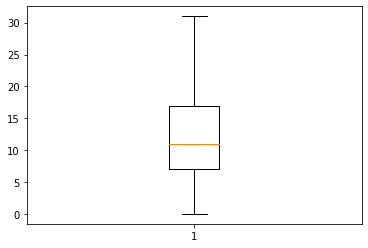

In [176]:
plt.boxplot(df_new["windspeed"])
print(len(df_new))
plt.show()

In [177]:
date = []
time = []

for i in range(0,len(df_new),1) :
    date.append(str(df_new["datetime"][i])[0:10])
    time.append(str(df_new["datetime"][i])[11:13])

df_new['date'] = date
df_new['time'] = time
df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19
10633,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20
10634,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21
10635,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22


In [178]:
df_new = df_new.drop(['datetime'], axis = 1)
df_new

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19
10633,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20
10634,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21
10635,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22


In [184]:
df_new['date'].replace('-', '',regex=True, inplace=True)
df_new

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,20110101,00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,20110101,01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,20110101,02
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,20110101,03
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,20110101,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,20121219,19
10633,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20121219,20
10634,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,20121219,21
10635,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,20121219,22


In [198]:
# df_new = df_new.astype({ date : int })
# df_new = df_new.astype({ time : int })
df_new['date'] = pd.to_numeric(df_new['date'])
df_new['time'] = pd.to_numeric(df_new['time'])
# df_new['date'].astype('float')
# df_new['time'].astype('float')
df_new.dtypes


season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date            int64
time            int64
dtype: object

In [241]:
df_new = df_new.drop(['casual'], axis = 1)
df_new = df_new.drop(['registered'], axis = 1)
df_new

KeyError: "['casual'] not found in axis"

In [242]:
# 훈련 시키기 (최근접 이웃)
from sklearn.neighbors import KNeighborsClassifier

In [243]:
#데이터 차원 변경 
df_new_count = df_new['count']
tr_target = df_new_count.to_numpy()
tr_target = tr_target.reshape(-1,1)
df_new_input = df_new.drop(['count'], axis = 1)
tr_input = df_new_input.to_numpy()

print(tr_target.shape, tr_input.shape)
tr_target
tr_input

(10637, 1) (10637, 10)


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0110101e+07, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0110101e+07, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0110101e+07, 2.0000000e+00],
       ...,
       [4.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.5001300e+01,
        2.0121219e+07, 2.1000000e+01],
       [4.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.0032000e+00,
        2.0121219e+07, 2.2000000e+01],
       [4.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.9981000e+00,
        2.0121219e+07, 2.3000000e+01]])

In [244]:
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [245]:
kn.fit(tr_input, tr_target)

C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [246]:
kn.score(tr_input, tr_target)

C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.19385164990128795

In [247]:
kn = KNeighborsClassifier()
kn.fit(tr_input, tr_target)
### 갯수 확인용 변수
nCnt = 0
# 1부터 2씩 증가....
for n in range(1, len(tr_target), 2) :
    ## 최근접 갯수 정의
    kn.n_neighbors = n
    ## 정확도 확인
    score = kn.score(tr_input, tr_target)
    ## 1보다 작은 값이 나오는 시점 확인
    if score < 1 :
        nCnt = n
        print(n, score)
        break

C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

3 0.31757074363072296


In [248]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(tr_input, tr_target)

C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [5]:
# 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [6]:
train_input, test_input,train_target, test_target = \
train_test_split (tr_input, tr_target, test_size = 0.25, random_state = 42)
print(train_input.shape, train_target.shape)
print (test_input.shape, test_target.shape)

NameError: name 'tr_input' is not defined

In [ ]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
knr.score(test_input,test_target)

In [252]:
test_prediction = knr.predict(test_input)
print(test_prediction)
print(test_target)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

[[ 70.2]
 [100.6]
 [164. ]
 ...
 [416.4]
 [ 85.6]
 [ 89. ]]
[[241]
 [281]
 [499]
 ...
 [573]
 [118]
 [ 33]]
87.7660902255639


In [253]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.6829157739971566
0.509120663654534


In [254]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

87.7660902255639


In [267]:
test_csv = pd.read_csv("./test.csv")
test_csv
date = []
time = []

for i in range(0,len(test_csv),1) :
    date.append(str(test_csv["datetime"][i])[0:10])
    time.append(str(test_csv["datetime"][i])[11:13])

test_csv['date'] = date
test_csv['time'] = time
test_csv = test_csv.drop(['datetime'], axis = 1)
test_csv['date'].replace('-', '',regex=True, inplace=True)
test_csv['date'] = pd.to_numeric(test_csv['date'])
test_csv['time'] = pd.to_numeric(test_csv['time'])
test_csv.shape


(6493, 10)

In [268]:
test_csv = test_csv.to_numpy()
test_csv

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 2.6002700e+01,
        2.0110120e+07, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0110120e+07, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0110120e+07, 2.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.1001400e+01,
        2.0121231e+07, 2.1000000e+01],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.9981000e+00,
        2.0121231e+07, 2.2000000e+01],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.9981000e+00,
        2.0121231e+07, 2.3000000e+01]])

In [264]:
train_input

array([[3.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0120913e+07, 3.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.9981000e+00,
        2.0110406e+07, 2.0000000e+00],
       [4.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 7.0015000e+00,
        2.0121005e+07, 7.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.1001400e+01,
        2.0120105e+07, 2.2000000e+01],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.5001300e+01,
        2.0110302e+07, 5.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 2.2002800e+01,
        2.0120511e+07, 1.0000000e+01]])

In [270]:
test_prediction = knr.predict(test_csv)
test_prediction

array([[ 21.6],
       [ 20.6],
       [ 19. ],
       ...,
       [197.2],
       [191.8],
       [201.2]])

In [274]:
test_prediction = knr.predict(test_csv)

submission['count'] = test_prediction

submission.to_csv('submission.csv', index=False)